In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [5]:
# Dataset import
df_sales = pd.read_csv('../data/sales.csv')
df_scp = pd.read_csv('../data/sale_cust_product.csv')

In [6]:
# Sales column data conversion
df_sales['order_number'] = df_sales['order_number'].astype('string')
df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], format = '%d-%m-%Y', errors='coerce')
df_sales['shipping_date'] = pd.to_datetime(df_sales['shipping_date'], format = '%d-%m-%Y', errors='coerce')
df_sales['due_date'] = pd.to_datetime(df_sales['due_date'], format = '%d-%m-%Y', errors='coerce')

# Sales, order year calculation for yearly sale trend
df_sales['order_year'] = df_sales['order_date'].dt.year
df_sales['order_year'] = df_sales['order_year'].fillna(0)
df_sales['order_year'] = df_sales['order_year'].astype('int')

# Sales, order month no. calculation for monthly sale trend
df_sales['order_month_no'] = df_sales['order_date'].dt.month
df_sales['order_month_no'] = df_sales['order_month_no'].fillna(0)
df_sales['order_month_no'] = df_sales['order_month_no'].astype('int')

# scp column data conversion
df_scp['order_number'] = df_scp['order_number'].astype('string')
df_scp['category'] = df_scp['category'].astype('string')
df_scp['subcategory'] = df_scp['subcategory'].astype('string')
df_scp['full_name'] = df_scp['full_name'].astype('string')
df_scp['country'] = df_scp['country'].astype('string')
df_scp['order_date'] = pd.to_datetime(df_scp['order_date'], format = '%d-%m-%Y', errors='coerce')
df_scp['shipping_date'] = pd.to_datetime(df_scp['shipping_date'], format = '%d-%m-%Y', errors='coerce')
df_scp['due_date'] = pd.to_datetime(df_scp['due_date'], format = '%d-%m-%Y', errors='coerce')

In [7]:
# Calculating importent KPI's
df_scp['total_cost'] = df_scp['cost_price']*df_scp['quantity']
df_scp['gross_profit'] = df_scp['total_sale'] - df_scp['total_cost']

- top buyers

In [8]:
df_scp.groupby('full_name')[['total_sale']].sum().sort_values('total_sale', ascending=False).head()

,total_sale
full_name,
Jordan Turner,15998
Willie Xu,13489
Kaitlyn Henderson,13294
Nichole Nara,13294
Margaret He,13268


- Top products by sales and gross profit

In [9]:
top_product = df_scp.groupby('subcategory')[['total_sale', 'gross_profit']].sum().sort_values('total_sale', ascending=False).head()
top_product = top_product.reset_index()
top_product

,subcategory,total_sale,gross_profit
0,Road Bikes,14519438,5300363
1,Mountain Bikes,9952254,4354332
2,Touring Bikes,3844580,1454870
3,Tires and Tubes,244634,153924
4,Helmets,225435,141702


In [10]:
def formatDollar(x, pos):
    if x >= 1_000_000:
      return f'{x * 1e-6:.1f}M'
    if x >= 1_000:
      return f'{x*1e-3:.0f}K'
    else:
      return str(x)

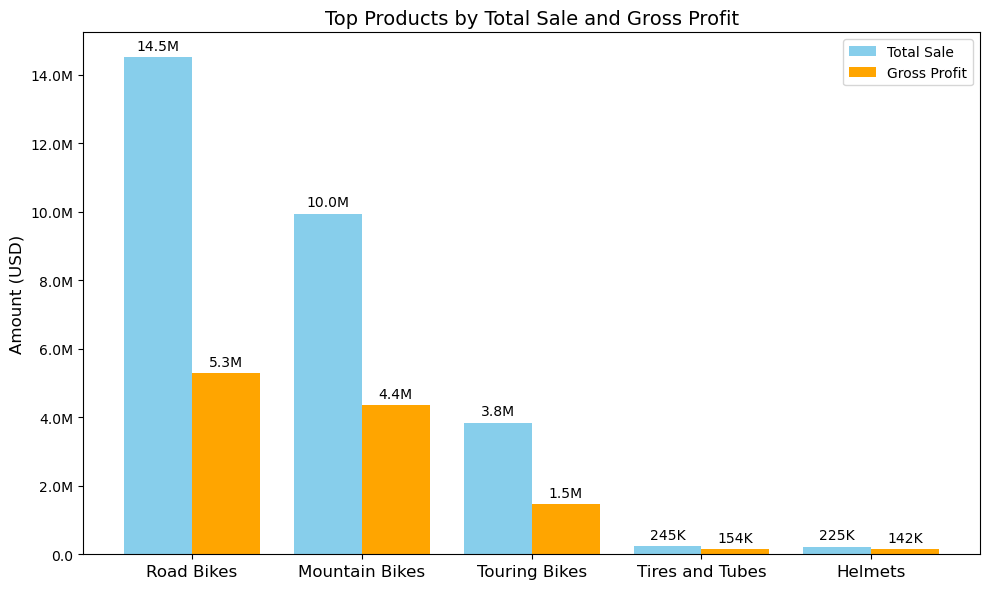

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width adjustment
x = range(len(top_product))

bar1 = ax.bar(x, top_product['total_sale'], width=0.4, label='Total Sale', color='skyblue')
bar2 = ax.bar([i + 0.4 for i in x], top_product['gross_profit'], width=0.4, label='Gross Profit', color='orange')

# Axis formatting
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(top_product['subcategory'], fontsize=12)

# Format Y-axis as dollars in thousands
ax.yaxis.set_major_formatter(FuncFormatter(formatDollar))

# Add data labels
ax.bar_label(bar1, labels=[formatDollar(val, None) for val in top_product['total_sale']], padding=3, fontsize=10)
ax.bar_label(bar2, labels=[formatDollar(val, None) for val in top_product['gross_profit']], padding=3, fontsize=10)

# Labels and title
ax.set_ylabel('Amount (USD)', fontsize=12)
plt.title('Top Products by Total Sale and Gross Profit', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


- Sales and gross profit for different countries

In [12]:
country_sale = df_scp.groupby('country')[['total_sale', 'gross_profit']].agg('sum').sort_values('total_sale', ascending=False)
country_sale = country_sale.reset_index()
country_sale

,country,total_sale,gross_profit
0,United States,9162327,3715394
1,Australia,9060172,3542133
2,United Kingdom,3391376,1342468
3,Germany,2894066,1147605
4,France,2643751,1041862
5,Canada,1977738,811661


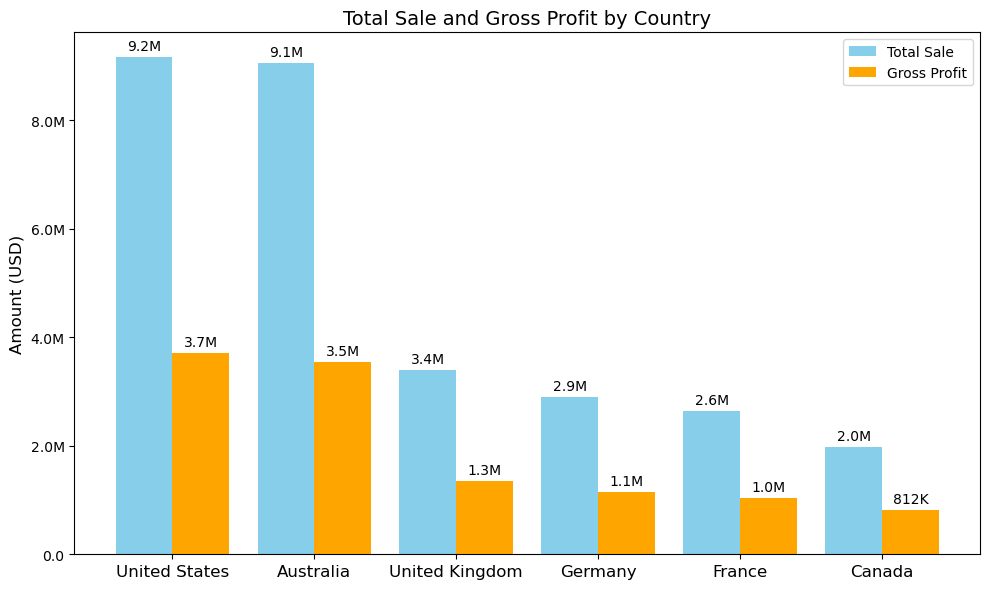

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width adjustment
x = range(len(country_sale))

bar1 = ax.bar(x, country_sale['total_sale'], width=0.4, label='Total Sale', color='skyblue')
bar2 = ax.bar([i + 0.4 for i in x], country_sale['gross_profit'], width=0.4, label='Gross Profit', color='orange')

# Axis formatting
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(country_sale['country'], fontsize=12)

# Format Y-axis as dollars in thousands
ax.yaxis.set_major_formatter(FuncFormatter(formatDollar))

# Add data labels
ax.bar_label(bar1, labels=[formatDollar(val, None) for val in country_sale['total_sale']], padding=3, fontsize=10)
ax.bar_label(bar2, labels=[formatDollar(val, None) for val in country_sale['gross_profit']], padding=3, fontsize=10)

# Labels and title
ax.set_ylabel('Amount (USD)', fontsize=12)
plt.title('Total Sale and Gross Profit by Country', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


- Sales and Gross profit for different categories

In [14]:
sale_category = df_scp.groupby('category')[['total_sale','gross_profit']].sum().sort_values('total_sale', ascending=False).reset_index()
sale_category

,category,total_sale,gross_profit
0,Bikes,28316272,11109565
1,Accessories,700262,439510
2,Clothing,339716,136682


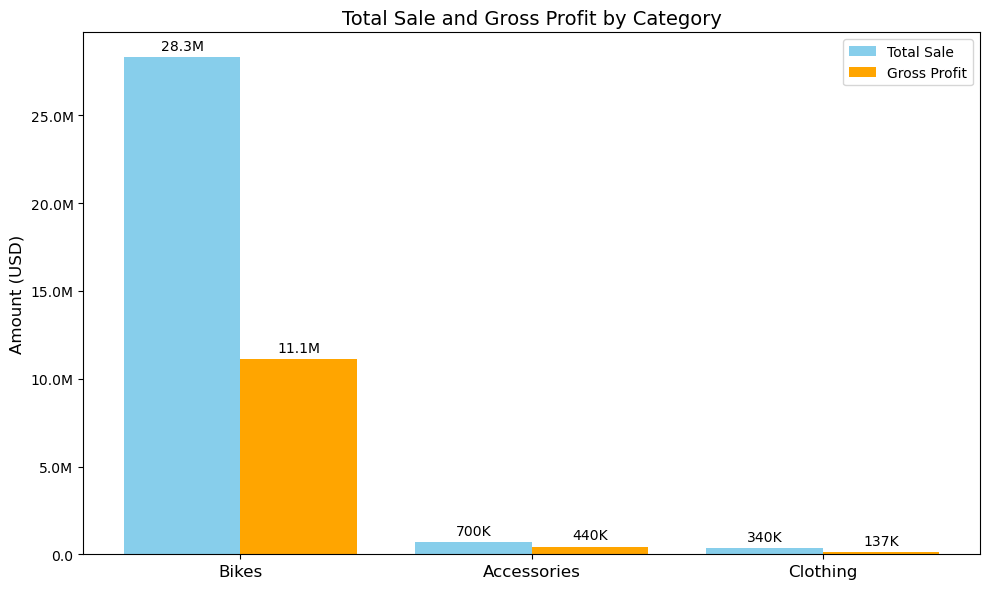

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width adjustment
x = range(len(sale_category))

bar1 = ax.bar(x, sale_category['total_sale'], width=0.4, label='Total Sale', color='skyblue')
bar2 = ax.bar([i + 0.4 for i in x], sale_category['gross_profit'], width=0.4, label='Gross Profit', color='orange')

# Axis formatting
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(sale_category['category'], fontsize=12)

# Format Y-axis as dollars in thousands
ax.yaxis.set_major_formatter(FuncFormatter(formatDollar))

# Add data labels
ax.bar_label(bar1, labels=[formatDollar(val, None) for val in sale_category['total_sale']], padding=3, fontsize=10)
ax.bar_label(bar2, labels=[formatDollar(val, None) for val in sale_category['gross_profit']], padding=3, fontsize=10)

# Labels and title
ax.set_ylabel('Amount (USD)', fontsize=12)
plt.title('Total Sale and Gross Profit by Category', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


- divide the category according to the different region, to find which country are making more purchase on which kind of category

In [16]:
df_plot = df_scp.groupby(['country', 'category'])[['total_sale']].sum().reset_index()

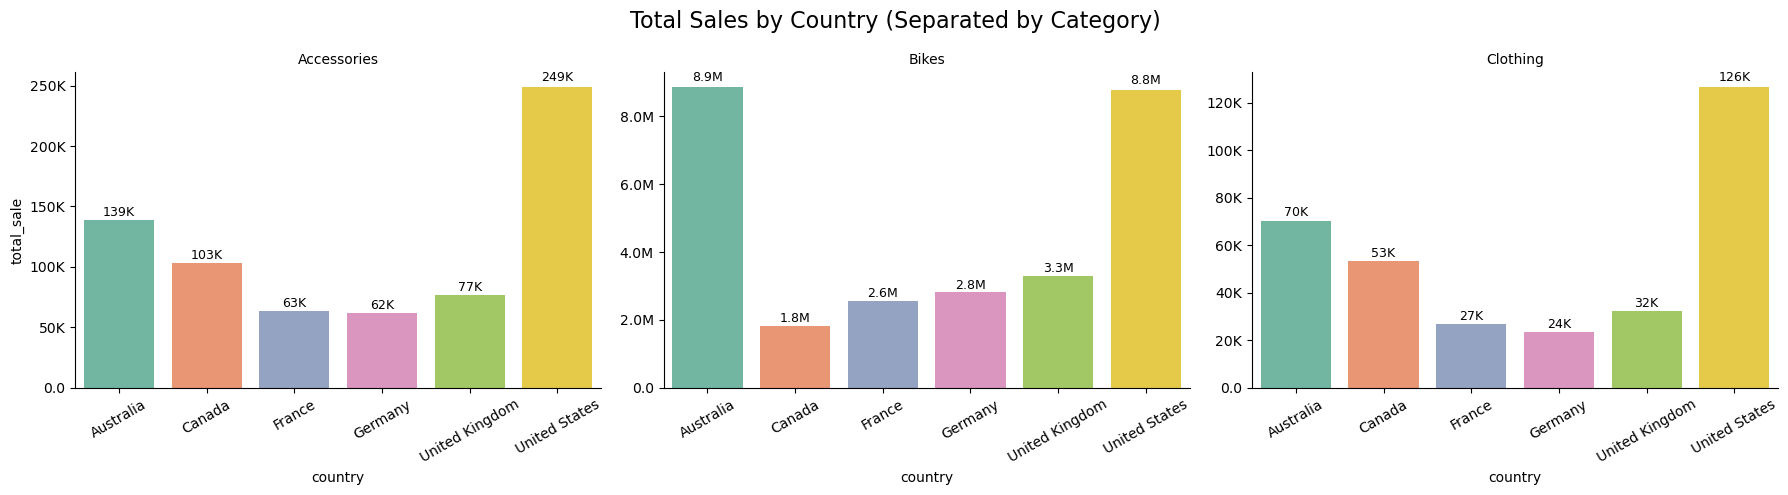

In [17]:
# Create facet grid
g = sns.FacetGrid(df_plot, col='category', sharey=False, height=5, aspect=1.2)

g.map_dataframe(sns.barplot, x='country', y='total_sale', palette='Set2', hue = 'country',order=df_plot['country'].unique())

# Rotate x-axis, add formatting
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=30)
    ax.yaxis.set_major_formatter(FuncFormatter(formatDollar))
    for p in ax.patches:
        val = p.get_height()
        if val > 0:
            label = f"{val / 1_000_000:.1f}M" if val >= 1_000_000 else f"{val / 1_000:.0f}K"
            ax.text(p.get_x() + p.get_width()/2, val + 0.01 * val, label,
                    ha='center', va='bottom', fontsize=9)

g.set_titles(col_template="{col_name}")
g.figure.subplots_adjust(top=0.85)
g.figure.suptitle("Total Sales by Country (Separated by Category)", fontsize=16)
plt.tight_layout()
plt.show()

- Yearl sales trend, then monthly sales trend

In [18]:
yearly_sales = df_sales.groupby('order_year')[['sales_amount']].sum().sort_values('sales_amount', ascending=False).head().reset_index()
yearly_sales

,order_year,sales_amount
0,2013,16337222
1,2011,7075088
2,2012,5842231
3,2014,45642
4,2010,43419


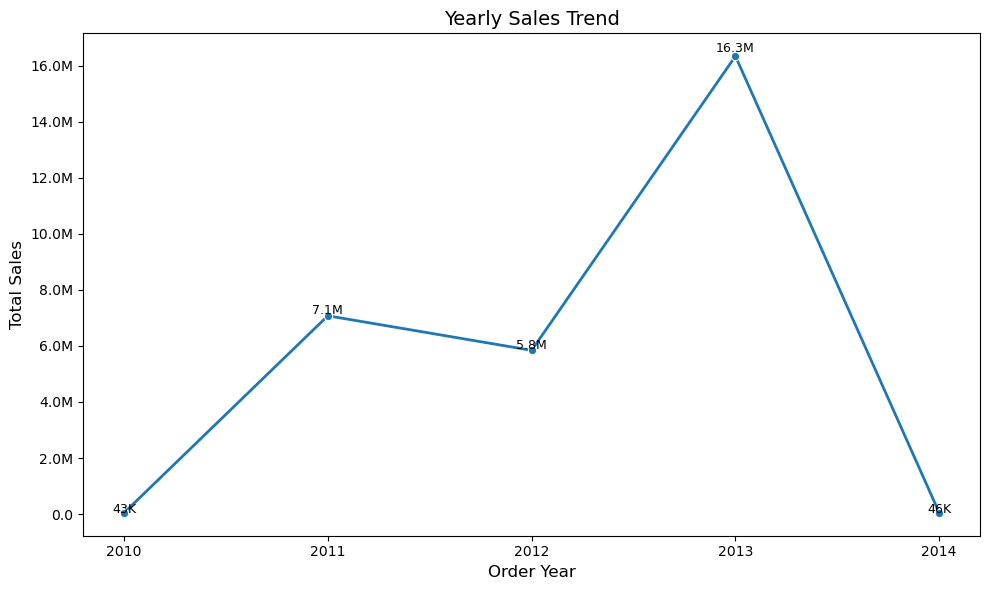

In [19]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_sales, x='order_year', y='sales_amount', marker='o', linewidth=2)

# Y-axis formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatDollar))
plt.xticks(ticks=yearly_sales['order_year'], labels=yearly_sales['order_year'])

# Labels and title
plt.title('Yearly Sales Trend', fontsize=14)
plt.xlabel('Order Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Annotate points
for i, row in yearly_sales.iterrows():
    val = row.sales_amount
    label = f"{val / 1_000_000:.1f}M" if val >= 1_000_000 else f"{val / 1_000:.0f}K"
    plt.text(row.order_year, val + 0.01 * val, label, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [20]:
# Filter for selected years
df_filtered = df_sales[df_sales['order_year'].isin([2011, 2012, 2013])]

# Group and reset index
df_monthly = df_filtered.groupby(['order_year', 'order_month_no'])[['sales_amount']].sum().reset_index()

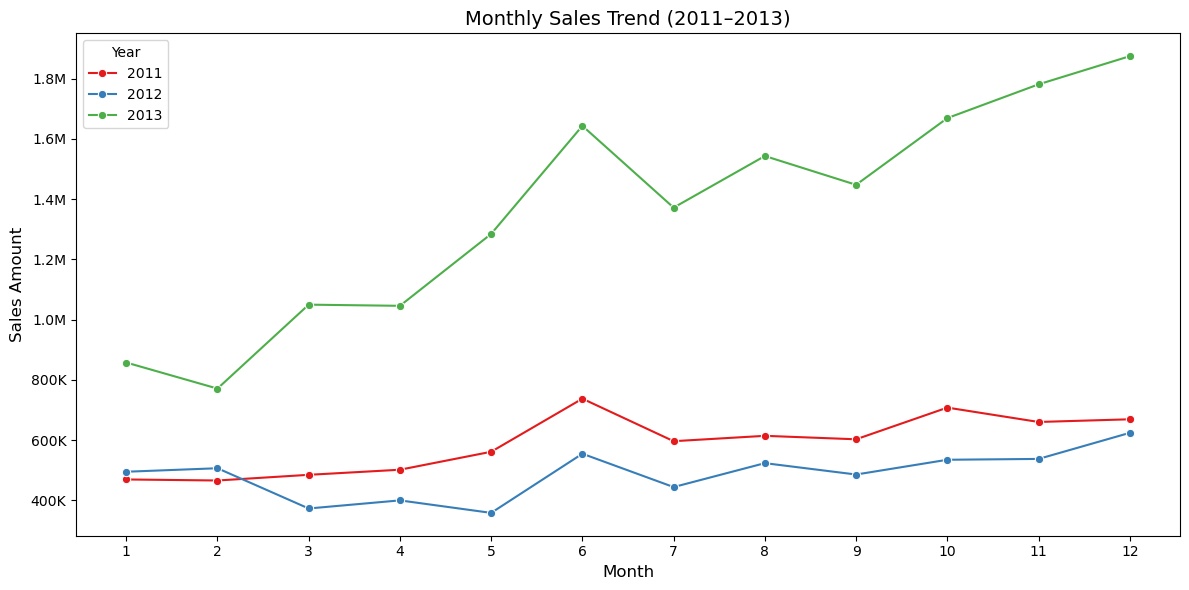

In [21]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='order_month_no', y='sales_amount', hue='order_year', palette='Set1', marker='o')

# format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatDollar))

# Labels and title
plt.title('Monthly Sales Trend (2011–2013)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(range(1, 13))  # Ensure months 1 to 12 appear

plt.legend(title='Year')
plt.tight_layout()
plt.show()